In [2]:
pwd

'/home/rimmanni/Medical_Images/Scaling_experiments/Chexpert'

In [3]:
import torch
torch.cuda.set_device(4)
print(torch.cuda.current_device())

4


In [4]:
%run ../../prepare_data.py
%run ../../architectures.py

In [5]:
batch_size = 32

In [6]:
train_loader, valid_loader, valid_dataset = get_chexpert_dataloaders(batch_size)

In [7]:
x, y = next(iter(train_loader))

In [8]:
x.shape, y.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 5]))

In [9]:
model = resnet18(num_classes=5, block=depthwise_block).cuda()

In [10]:
sum(p.numel() for p in model.parameters())

730245

CPU times: user 40.4 s, sys: 7.87 s, total: 48.3 s
Wall time: 52 s


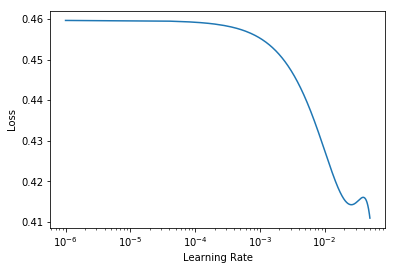

In [9]:
%%time
lrs, losses = LR_range_finder(model, train_loader, 
                              loss_fn=F.binary_cross_entropy_with_logits, 
                              binary=False, lr_high=0.05)
plot_lr(lrs, losses)

# Training

In [11]:
widths = [1.0, 0.75, 0.5, 0.25]
depths = [[[[64, 2], [128, 2]], [[256, 2], [512, 1]]],
          [[[64, 2], [128, 2]], [[256, 1], [512, 1]]],
          [[[64, 2], [128, 1]], [[256, 1], [512, 1]]],
          [[[64, 2], [128, 1]], [[256, 2], [512, 1]]],
          [[[64, 1], [128, 1]], [[256, 2], [512, 1]]],
          [[[64, 1], [128, 1]], [[256, 1], [512, 1]]],
         ]

In [ ]:
data = []

for w in widths:
    for d in depths:
        d_s = sum(j[1] for i in d for j in i)
        print('width multiplier - %.3f depth multiplier - %.3f' % (w, d_s))
        model = resnet18(num_classes=5, block=depthwise_block, width_mult=w, 
                         inverted_residual_setting1=d[0], 
                         inverted_residual_setting2=d[1]).cuda()
        
        p = sum(p.numel() for p in model.parameters())
        optimizer = create_optimizer(model, 0.001)
        score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                       loss_fn=F.binary_cross_entropy_with_logits, 
                                       dataset='chexpert', binary=False, max_lr=0.001, epochs=15)
        
        p = "/home/rimmanni/Medical_Images/Scaling_experiments/Chexpert/ResDepth_" + str(w) + '_' + str(depths.index(d))
        save_model(model, p)
        data.append([w, d_s, score, p, t])
        print('')

width multiplier - 1.000 depth multiplier - 7.000
train_loss 0.422 val_loss 0.425 val_auc_score 0.610
----End of step 0:01:30.813074
train_loss 0.412 val_loss 0.423 val_auc_score 0.631
----End of step 0:01:29.537312
train_loss 0.407 val_loss 0.425 val_auc_score 0.646
----End of step 0:01:32.693696
train_loss 0.400 val_loss 0.409 val_auc_score 0.662
----End of step 0:01:33.322792
train_loss 0.393 val_loss 0.422 val_auc_score 0.668
----End of step 0:01:31.208804
train_loss 0.389 val_loss 0.409 val_auc_score 0.671
----End of step 0:01:30.201969
train_loss 0.385 val_loss 0.406 val_auc_score 0.685
----End of step 0:01:29.203531
train_loss 0.382 val_loss 0.412 val_auc_score 0.682
----End of step 0:01:27.408126
train_loss 0.380 val_loss 0.402 val_auc_score 0.685
----End of step 0:01:27.855715
train_loss 0.377 val_loss 0.396 val_auc_score 0.690
----End of step 0:01:30.009036
train_loss 0.375 val_loss 0.403 val_auc_score 0.692
----End of step 0:01:29.241566
train_loss 0.373 val_loss 0.405 val_a

train_loss 0.384 val_loss 0.399 val_auc_score 0.682
----End of step 0:01:18.491887
train_loss 0.382 val_loss 0.399 val_auc_score 0.683
----End of step 0:01:19.008253
train_loss 0.380 val_loss 0.398 val_auc_score 0.683
----End of step 0:01:19.022534
train_loss 0.377 val_loss 0.396 val_auc_score 0.686
----End of step 0:01:19.436302
train_loss 0.377 val_loss 0.396 val_auc_score 0.686
----End of step 0:01:19.346126
train_loss 0.375 val_loss 0.395 val_auc_score 0.687
----End of step 0:01:18.269738
train_loss 0.375 val_loss 0.395 val_auc_score 0.687
----End of step 0:01:18.596128

width multiplier - 0.750 depth multiplier - 6.000
train_loss 0.425 val_loss 0.433 val_auc_score 0.591
----End of step 0:01:15.288949
train_loss 0.414 val_loss 0.432 val_auc_score 0.609
----End of step 0:01:15.444502
train_loss 0.411 val_loss 0.422 val_auc_score 0.615
----End of step 0:01:16.299149
train_loss 0.405 val_loss 0.413 val_auc_score 0.637
----End of step 0:01:15.897261
train_loss 0.401 val_loss 0.411 val_

train_loss 0.381 val_loss 0.401 val_auc_score 0.674
----End of step 0:01:07.062598

width multiplier - 0.500 depth multiplier - 6.000
train_loss 0.427 val_loss 0.434 val_auc_score 0.582
----End of step 0:01:05.373491
train_loss 0.416 val_loss 0.428 val_auc_score 0.604
----End of step 0:01:06.171330
train_loss 0.414 val_loss 0.431 val_auc_score 0.611
----End of step 0:01:04.167744
train_loss 0.409 val_loss 0.419 val_auc_score 0.622
----End of step 0:01:04.472322
train_loss 0.405 val_loss 0.422 val_auc_score 0.627
----End of step 0:01:05.650919
train_loss 0.400 val_loss 0.414 val_auc_score 0.643
----End of step 0:01:04.360229
train_loss 0.397 val_loss 0.436 val_auc_score 0.646
----End of step 0:01:04.682219
train_loss 0.394 val_loss 0.412 val_auc_score 0.649
----End of step 0:01:05.306403
train_loss 0.392 val_loss 0.418 val_auc_score 0.654
----End of step 0:01:06.985488
train_loss 0.390 val_loss 0.407 val_auc_score 0.660
----End of step 0:01:07.326324
train_loss 0.388 val_loss 0.412 val_

In [ ]:
columns = ['width_x', 'depth_x', 'val_score', 'params', 'time_per_epoch']
df = pd.DataFrame(data=data, columns=columns)

In [ ]:
df.to_csv("chexpert_resnet_depthwise_13.csv", index=False)

In [ ]:
df_re = pd.read_csv('chexpert_resnet_depthwise_13.csv')

In [ ]:
df_re.head()